In [14]:
!pip install statsmodels

In [15]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
df = pd.read_csv("temperatura.csv")

In [17]:

print(df.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [18]:
df_num = df.select_dtypes(include=[np.number])


In [19]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    return np.sum((series[lag:] - mean) * (series[:n - lag] - mean)) / n

In [20]:
def autocorrelation(series, lag):
    return autocovariance(series, lag) / autocovariance(series, 0)

In [21]:
def adf_test(series):
    result = adfuller(series)
    print('  ADF:', result[0])
    print('p-valor:', result[1])
    for key, value in result[4].items():
        print(f'{key}: {value}')

In [22]:
def kpss_test(series):
    result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média
    print('  KPSS:', result[0])
    print('Valor-p:', result[1])
    print('Valores críticos:')
    for key, value in result[3].items():
        print(f'{key}: {value}')

In [23]:
def analyze_series(df_num):
    max_lag = 25
    lags = range(0, max_lag + 1)
    
    # analisa a primeira série do DataFrame
    serie = df_num.iloc[:, 0]  # Pega a primeira coluna numérica
    print(f'Analisando a série: {df_num.columns[0]}')
    
    # Testes ADF e KPSS
    print("\nResultado do Teste ADF:")
    adf_test(serie)
    
    print("\nResultado do Teste KPSS:")
    kpss_test(serie)
    
    # Autocovariância e autocorrelação
    auto_cov = [autocovariance(serie, lag) for lag in lags]
    auto_corr = [autocorrelation(serie, lag) for lag in lags]

    plt.figure(figsize=(10, 4))
    plt.plot(lags, auto_cov, marker='o', label='Autocovariância')
    plt.title('Autocovariância por Lag')
    plt.xlabel('Lag')
    plt.ylabel('Autocovariância')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(lags, auto_corr, marker='o', label='Autocorrelação')
    plt.title('Autocorrelação por Lag')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelação')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ACF Plot
    plt.figure(figsize=(10, 4))
    plot_acf(serie, lags=max_lag, title=f'ACF - {df_num.columns[0]}')
    plt.show()


Analisando a série: Temp_C
Analisando a série: Temp_C

Resultado do Teste ADF:
  ADF: -3.252861307848838
p-valor: 0.01712163615474537
1%: -3.43109790993778
5%: -2.861870526484161
10%: -2.566945934275714

Resultado do Teste KPSS:
  KPSS: 4.161936541635271
Valor-p: 0.01
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_23720\639422938.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média


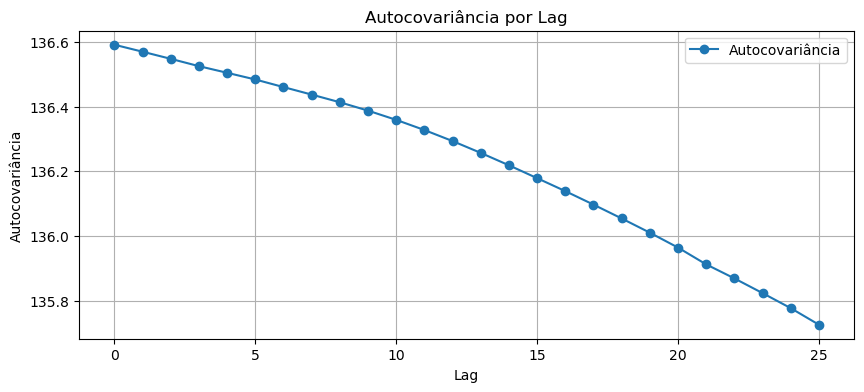

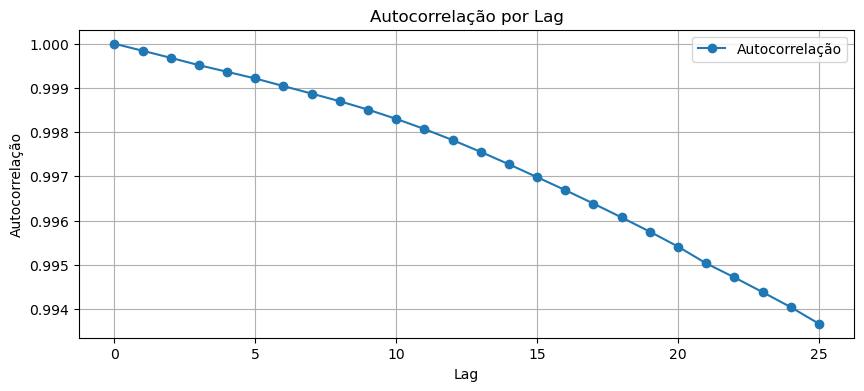

<Figure size 1000x400 with 0 Axes>

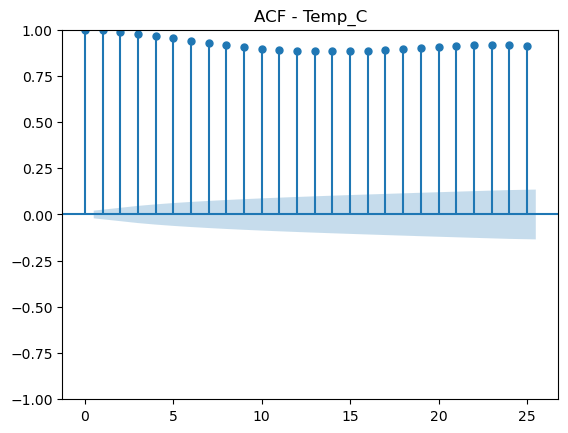


Analisando a série: Dew Point Temp_C
Analisando a série: Dew Point Temp_C

Resultado do Teste ADF:
  ADF: -4.760585358569438
p-valor: 6.465773129266446e-05
1%: -3.4310974824840628
5%: -2.861870337601791
10%: -2.5669458337323605

Resultado do Teste KPSS:
  KPSS: 4.516059287988747
Valor-p: 0.01
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_23720\639422938.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média


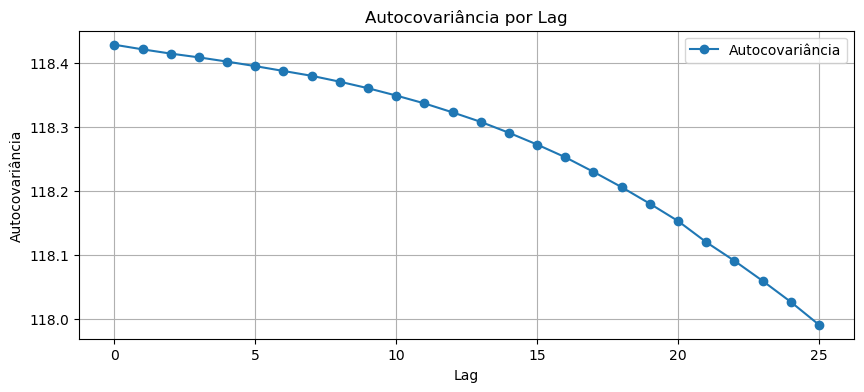

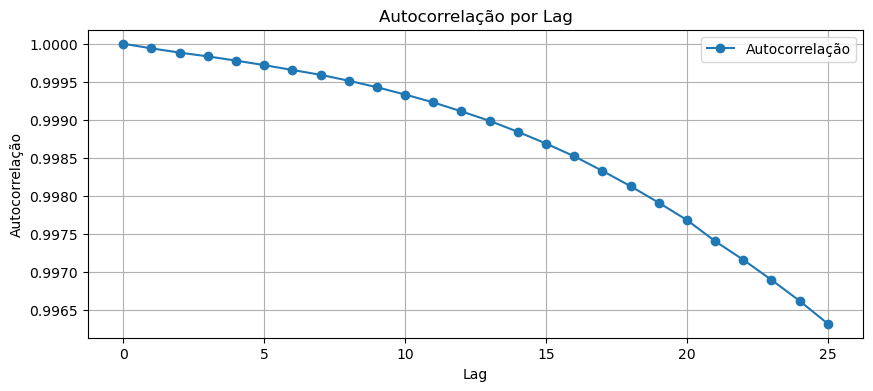

<Figure size 1000x400 with 0 Axes>

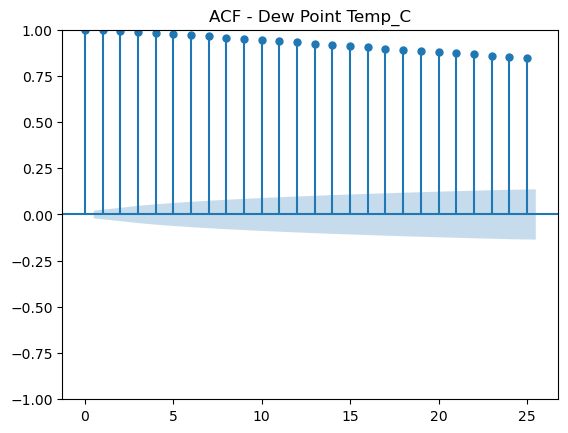


Analisando a série: Rel Hum_%
Analisando a série: Rel Hum_%

Resultado do Teste ADF:
  ADF: -11.550908752285702
p-valor: 3.4494226202480775e-21
1%: -3.43109697018412
5%: -2.8618701112277094
10%: -2.5669457132319233

Resultado do Teste KPSS:
  KPSS: 2.8522055447863024
Valor-p: 0.01
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_23720\639422938.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média


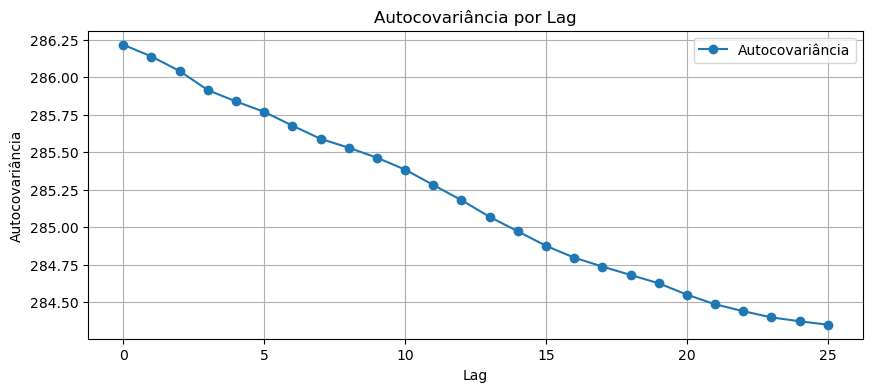

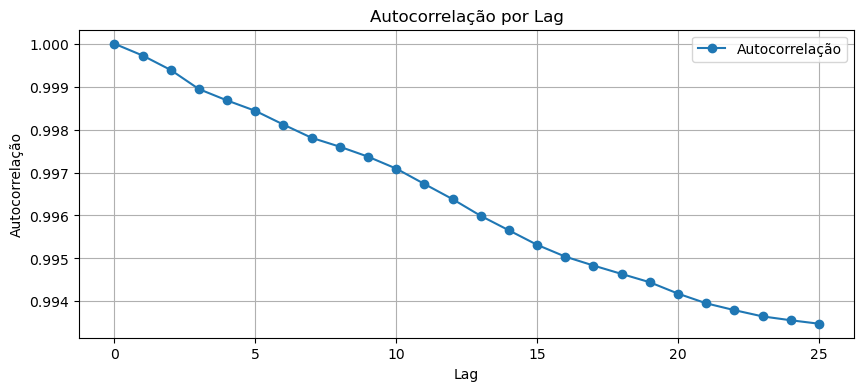

<Figure size 1000x400 with 0 Axes>

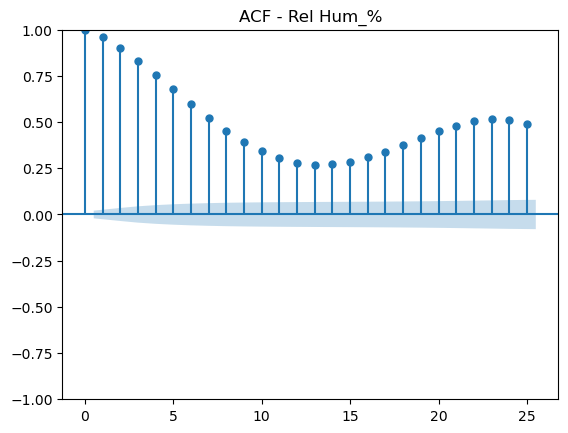


Analisando a série: Wind Speed_km/h
Analisando a série: Wind Speed_km/h

Resultado do Teste ADF:
  ADF: -14.248417551815487
p-valor: 1.4955450893123626e-26
1%: -3.4310971408727244
5%: -2.8618701866512555
10%: -2.5669457533803803

Resultado do Teste KPSS:
  KPSS: 0.35325107747977275
Valor-p: 0.09730557005182208
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


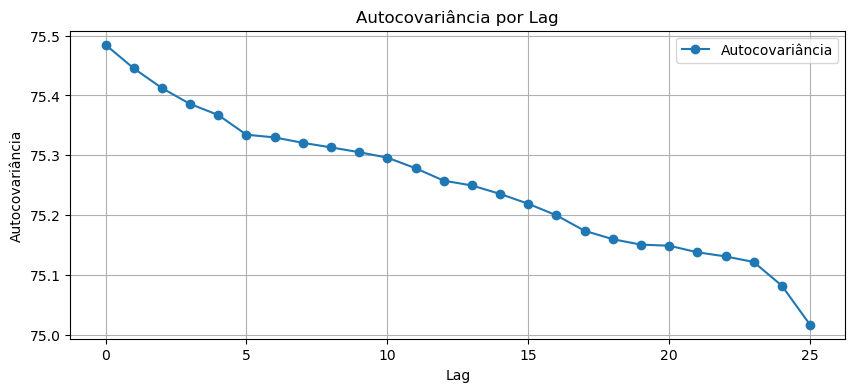

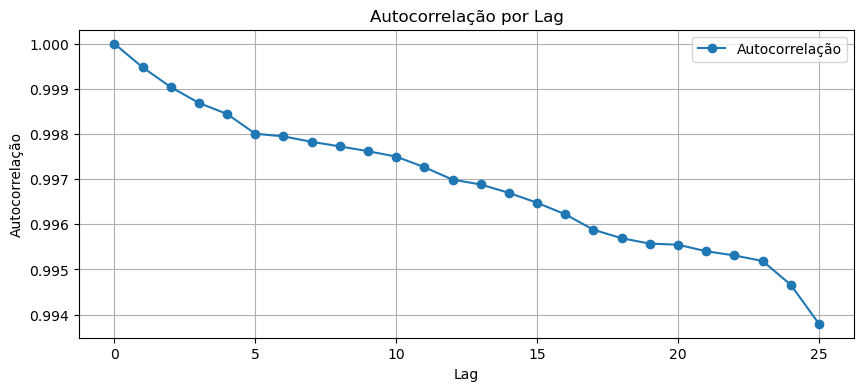

<Figure size 1000x400 with 0 Axes>

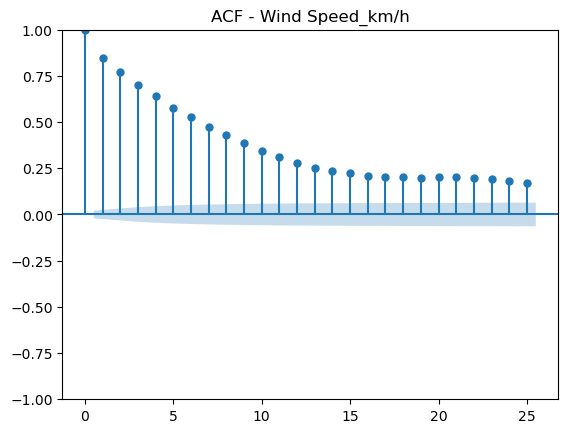


Analisando a série: Visibility_km
Analisando a série: Visibility_km

Resultado do Teste ADF:
  ADF: -12.200048381659792
p-valor: 1.2291320027721997e-22
1%: -3.431097226246283
5%: -2.8618702243759544
10%: -2.56694577346149

Resultado do Teste KPSS:
  KPSS: 1.34073756565605
Valor-p: 0.01
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_23720\639422938.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média


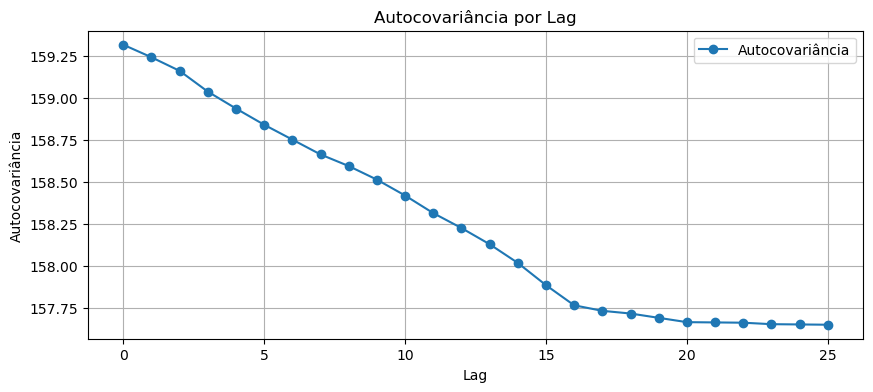

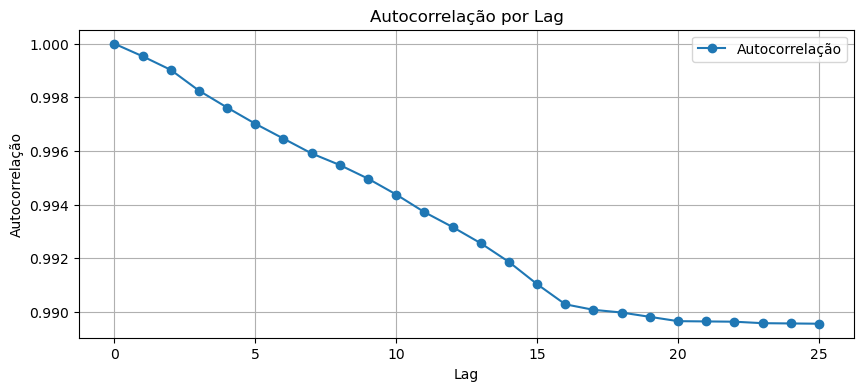

<Figure size 1000x400 with 0 Axes>

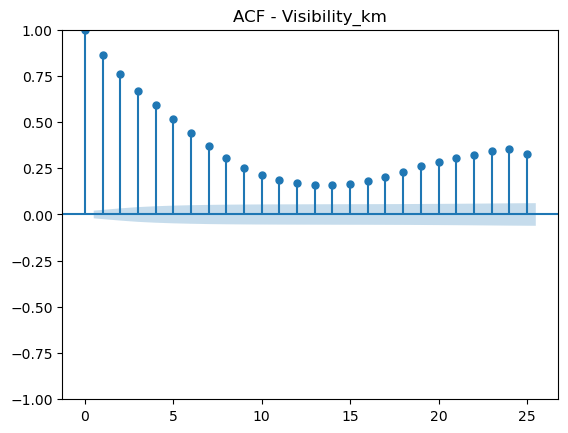


Analisando a série: Press_kPa
Analisando a série: Press_kPa

Resultado do Teste ADF:
  ADF: -9.256195464075672
p-valor: 1.4475097208809813e-15
1%: -3.43109790993778
5%: -2.861870526484161
10%: -2.566945934275714

Resultado do Teste KPSS:
  KPSS: 0.3282000027294036
Valor-p: 0.1
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\fernandaleao-ieg\AppData\Local\Temp\ipykernel_23720\639422938.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')  # Usando 'c' para teste de estacionariedade em torno da média


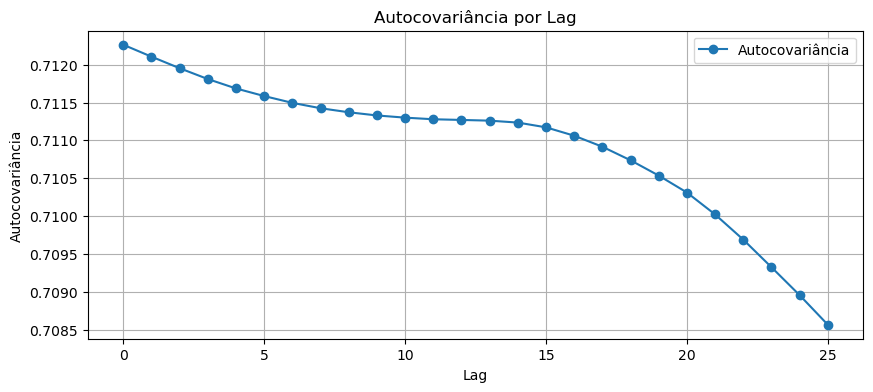

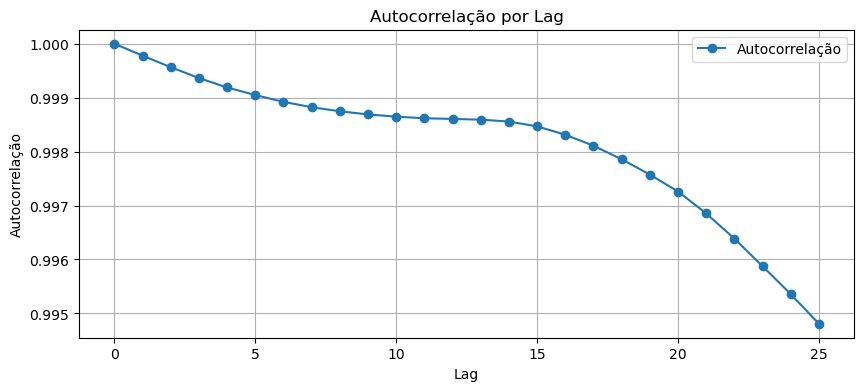

<Figure size 1000x400 with 0 Axes>

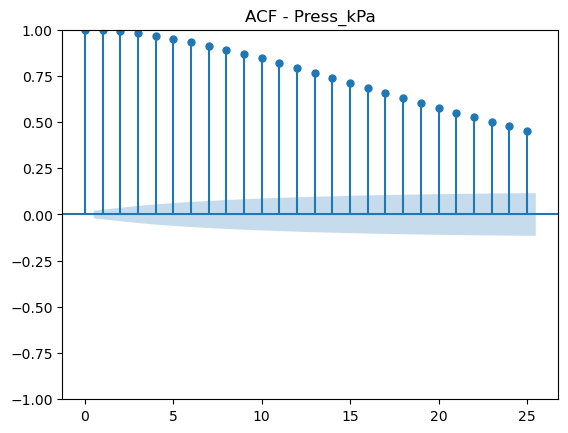

In [24]:
for column in df_num.columns:
    print(f"\nAnalisando a série: {column}")
    analyze_series(df_num[[column]])

## Resultados

### Série: **Temp\_C**

* **Teste ADF**:

  *   ADF: -3.25
  * p-valor: 0.0171 (menor que 0.05, indica rejeição da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 4.16
  * p-valor: 0.01 (menor que 0.05, indica rejeição da hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Não Estacionária**
  O teste ADF rejeita a hipótese nula de não estacionariedade, enquanto o KPSS rejeita a hipótese nula de estacionariedade, indicando que a série não é estacionária.

### Série: **Dew Point Temp\_C**

* **Teste ADF**:

  *   ADF: -4.76
  * p-valor: 0.0000646 (menor que 0.05, indica rejeição da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 4.52
  * p-valor: 0.01 (menor que 0.05, indica rejeição da hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Não Estacionária**
  Assim como na série anterior, os resultados dos testes ADF e KPSS indicam que a série não é estacionária.

### Série: **Rel Hum\_%**

* **Teste ADF**:

  *   ADF: -11.55
  * p-valor: 3.44e-21 (muito menor que 0.05, rejeição forte da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 2.85
  * p-valor: 0.01 (menor que 0.05, rejeição da hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Não Estacionária**
  Ambas as  s (ADF e KPSS) sugerem que esta série não é estacionária.

### Série: **Wind Speed\_km/h**

* **Teste ADF**:

  *   ADF: -14.25
  * p-valor: 1.5e-26 (muito menor que 0.05, rejeição forte da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 0.35
  * p-valor: 0.097 (maior que 0.05, não rejeita a hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Estacionária**
  O ADF rejeita a hipótese nula de não estacionariedade, e o KPSS não rejeita a hipótese de estacionariedade, indicando que a série é estacionária.

### Série: **Visibility\_km**

* **Teste ADF**:

  *   ADF: -12.20
  * p-valor: 1.23e-22 (muito menor que 0.05, rejeição forte da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 1.34
  * p-valor: 0.01 (menor que 0.05, rejeição da hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Não Estacionária**
  Apesar de o ADF indicar estacionariedade, o KPSS sugere que a série não é estacionária, portanto, a série é considerada não estacionária.

### Série: **Press\_kPa**

* **Teste ADF**:

  *   ADF: -9.26
  * p-valor: 1.45e-15 (muito menor que 0.05, rejeição forte da hipótese nula de não estacionariedade)
  * Valores críticos:

    * 1%: -3.43
    * 5%: -2.86
    * 10%: -2.57
* **Teste KPSS**:

  *   KPSS: 0.33
  * p-valor: 0.1 (maior que 0.05, não rejeita a hipótese nula de estacionariedade)
  * Valores críticos:

    * 10%: 0.347
    * 5%: 0.463
    * 2.5%: 0.574
    * 1%: 0.739
* **Conclusão**: **Estacionária**
  O ADF rejeita a hipótese nula de não estacionariedade, e o KPSS não rejeita a hipótese de estacionariedade, indicando que a série é estacionária.

## Resumo das Séries Estacionárias e Não Estacionárias:

* **Séries Estacionárias**:

  * Wind Speed\_km/h
  * Press\_kPa

* **Séries Não Estacionárias**:

  * Temp\_C
  * Dew Point Temp\_C
  * Rel Hum\_%
  * Visibility\_km


Resumo das Séries Estacionárias e Não Estacionárias:

Séries Estacionárias:

Wind Speed_km/h

Press_kPa

Séries Não Estacionárias:

Temp_C

Dew Point Temp_C

Rel Hum_%

Visibility_km